# Library

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [8]:
df = pd.read_csv("../data/IAT_data_imported.csv")
df.head()

,ID,Internet_usg,Internet_Add,Gender,Age_grp,Level_study,Yr_study,Discipline,stay_online,neglect_chores,...,play,interest,worthless,suicide,tiredness,uncomfortable,easily_tired,SQR_Total,New_SQR_total,SQR_catg
0,1,33,1,1,1,1,7,0,3,1,...,1,1,1,1,1,1,1,18,2,0
1,2,10,0,1,1,1,7,0,0,1,...,1,1,1,1,1,1,1,20,0,0
2,3,62,2,1,2,0,3,0,3,4,...,1,0,1,1,1,1,1,10,10,1
3,4,27,1,0,1,0,3,0,1,2,...,1,0,1,1,1,1,1,19,1,0
4,5,41,2,0,1,1,7,0,4,3,...,1,1,1,1,1,1,0,16,4,0


# Struktur Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   984 non-null    int64 
 1   Internet_usg         984 non-null    int64 
 2   Internet_Add         984 non-null    int64 
 3   Gender               984 non-null    int64 
 4   Age_grp              984 non-null    int64 
 5   Level_study          984 non-null    int64 
 6   Yr_study             984 non-null    int64 
 7   Discipline           984 non-null    int64 
 8   stay_online          984 non-null    int64 
 9   neglect_chores       984 non-null    int64 
 10  excitement           984 non-null    int64 
 11  relationships        984 non-null    int64 
 12  life_complaint       984 non-null    int64 
 13  school_work          984 non-null    int64 
 14  email_socialmedia    984 non-null    int64 
 15  job_performance      984 non-null    int64 
 16  defensiv

# Eksplorasi Data

In [7]:
# cek missing values
df.isnull().sum()

ID                     0
Internet_usg           0
Internet_Add           0
Gender                 0
Age_grp                0
Level_study            0
Yr_study               0
Discipline             0
stay_online            0
neglect_chores         0
excitement             0
relationships          0
life_complaint         0
school_work            0
email_socialmedia      0
job_performance        0
defensive_secretive    0
disturbing_thoughts    0
online_anticipation    0
life_no_internet       0
act_annoyed            0
late_night_logins      0
feel_preoccupied       0
online_glued           0
time_cutdown           0
hide_online            0
more_online_time       0
feel_depressed         0
filter_$               0
headache               0
appetite               0
sleep                  0
fear                   0
shaking                0
nervous                0
digestion              0
troubled               0
unhappy                0
cry                    0
enjoyment              0


In [8]:
# cek duplikasi ID
df['ID'].duplicated().sum()

np.int64(0)

## Distribusi Data

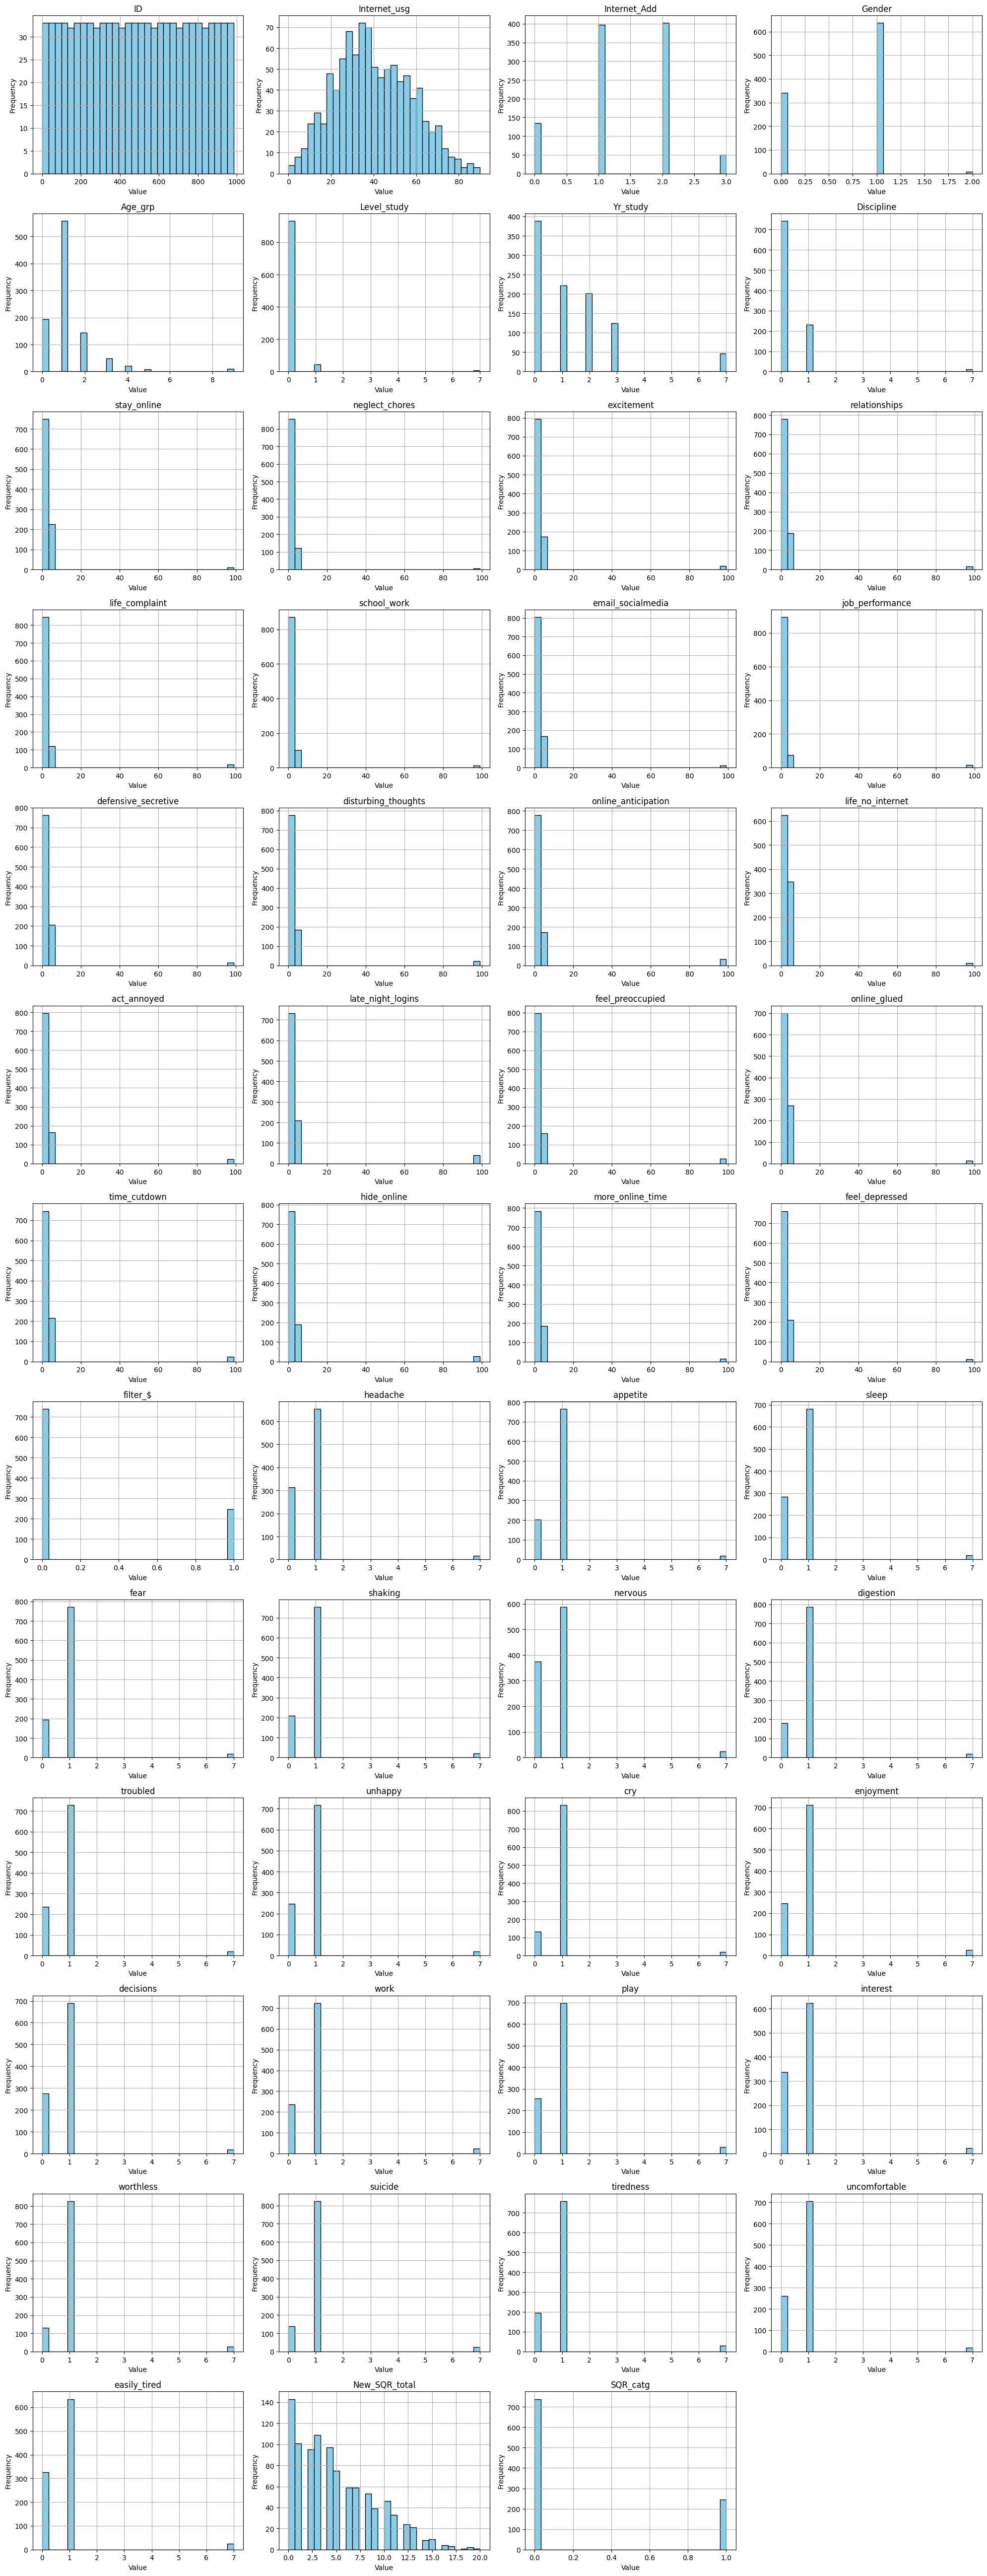

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(numeric_cols)//4 + 1, ncols=4, figsize=(20, 4*(len(numeric_cols)//4 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Feature Engineering

In [20]:
df['SQR_Total'] = pd.to_numeric(df['SQR_Total'], errors='coerce')
missing_sqr_total = df['SQR_Total'].isnull().sum()
print(f"Jumlah missing values pada SQR_Total: {missing_sqr_total}")

Jumlah missing values pada SQR_Total: 117


In [21]:
Y = 'Internet_Add'
print("Correlations with target variable", Y)
print(df.corr()[Y].sort_values(ascending=False))

Correlations with target variable Internet_Add
Internet_Add           1.000000
Internet_usg           0.924877
New_SQR_total          0.376817
filter_$               0.328325
SQR_catg               0.328325
neglect_chores         0.073092
stay_online            0.070882
school_work            0.065835
email_socialmedia      0.048277
job_performance        0.041238
feel_depressed         0.028088
online_anticipation    0.026418
more_online_time       0.020498
life_no_internet       0.020185
defensive_secretive    0.020149
relationships          0.019316
life_complaint         0.013877
time_cutdown           0.010790
feel_preoccupied       0.007623
act_annoyed            0.007179
excitement             0.004486
Discipline             0.002219
ID                     0.000318
shaking               -0.000884
online_glued          -0.003411
worthless             -0.004841
hide_online           -0.011642
late_night_logins     -0.019300
suicide               -0.022829
troubled              -0.

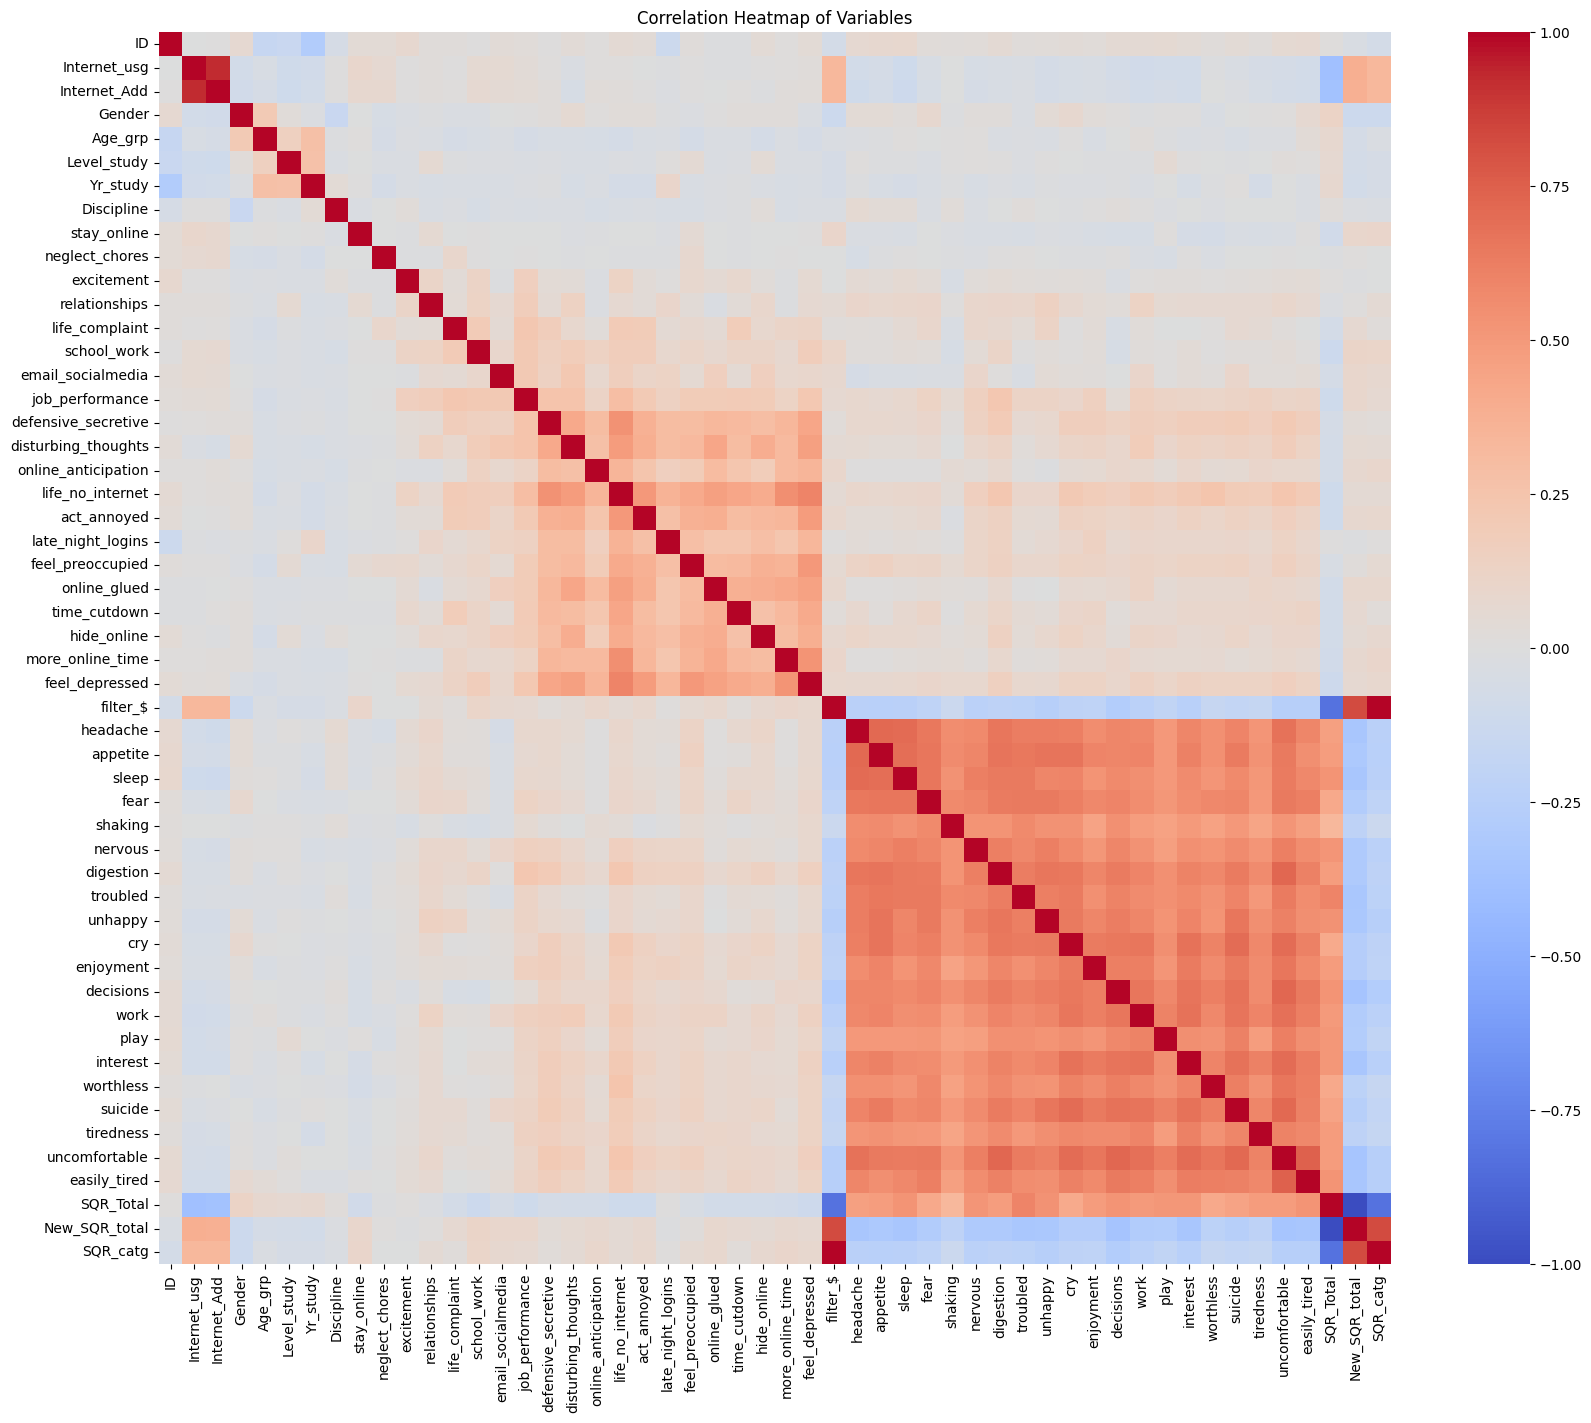

In [22]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Variables')
plt.show()

# MODELLING

# REPORT

In [ ]:
import io
from contextlib import redirect_stdout

# Capture df.info() output
info_buffer = io.StringIO()
with redirect_stdout(info_buffer):
    df.info()
info_str = info_buffer.getvalue()

# Generate distribution plots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//4 + 1, ncols=4, figsize=(20, 4*(len(numeric_cols)//4 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('../distribution_plots.png')
plt.close()

# Generate correlation heatmap
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Variables')
plt.savefig('../correlation_heatmap.png')
plt.close()

# Variable explanations
explanations = {
    'ID': 'Identifier unik untuk setiap mahasiswa',
    'Internet_usg': 'Internet usage - Penggunaan internet (dalam jam atau frekuensi)',
    'Internet_Add': 'Internet addiction level - Tingkat kecanduan internet (0=normal, 1=ringan, 2=berat)',
    'Gender': 'Jenis kelamin (0=perempuan, 1=laki-laki)',
    'Age_grp': 'Kelompok usia',
    'Level_study': 'Tingkat studi (misal undergraduate)',
    'Yr_study': 'Tahun studi',
    'Discipline': 'Disiplin atau jurusan studi',
    'stay_online': 'How often do you stay online longer than intended? - Seberapa sering Anda tetap online lebih lama dari yang dimaksudkan?',
    'neglect_chores': 'How often do you neglect household chores to spend more time online? - Seberapa sering Anda mengabaikan tugas rumah tangga untuk lebih banyak waktu online?',
    'excitement': 'How often do you feel excited when online? - Seberapa sering Anda merasa excited saat online?',
    'relationships': 'How often do you prefer the excitement of the Internet to intimacy with your partner? - Seberapa sering Anda lebih suka kegembiraan internet daripada keintiman dengan pasangan?',
    'life_complaint': 'How often do you form new relationships with fellow online users? - Seberapa sering Anda membentuk hubungan baru dengan pengguna online lainnya?',
    'school_work': 'How often do you check your e-mail before something else you need to do? - Seberapa sering Anda memeriksa email sebelum melakukan hal lain yang perlu dilakukan?',
    'email_socialmedia': 'How often do your grades or school work suffer because of the amount of time you spend online? - Seberapa sering nilai atau pekerjaan sekolah Anda menderita karena waktu yang dihabiskan online?',
    'job_performance': 'How often do others in your life complain to you about the amount of time you spend online? - Seberapa sering orang lain dalam hidup Anda mengeluh tentang waktu yang Anda habiskan online?',
    'defensive_secretive': 'How often do you feel the need to conceal how much time you spend online? - Seberapa sering Anda merasa perlu menyembunyikan berapa banyak waktu yang Anda habiskan online?',
    'disturbing_thoughts': 'How often do you feel depressed, moody, or nervous when you are offline, which goes away once you are back online? - Seberapa sering Anda merasa depresi, moody, atau gugup saat offline, yang hilang saat kembali online?',
    'online_anticipation': 'How often do you find yourself anticipating when you will go online again? - Seberapa sering Anda menemukan diri Anda mengantisipasi kapan Anda akan online lagi?',
    'life_no_internet': 'How often do you fear that life without the Internet would be boring, empty, and joyless? - Seberapa sering Anda takut bahwa hidup tanpa internet akan membosankan, kosong, dan tanpa kegembiraan?',
    'act_annoyed': 'How often do you snap, yell, or act annoyed if someone bothers you while you are online? - Seberapa sering Anda marah, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat online?',
    'late_night_logins': 'How often do you lose sleep due to late-night logins? - Seberapa sering Anda kehilangan tidur karena login malam hari?',
    'feel_preoccupied': 'How often do you feel preoccupied with the Internet when off-line, or fantasize about being online? - Seberapa sering Anda merasa sibuk dengan internet saat offline, atau membayangkan online?',
    'online_glued': 'How often do you try to cut down the amount of time you spend online and fail? - Seberapa sering Anda mencoba mengurangi waktu online dan gagal?',
    'time_cutdown': 'How often do you try to hide how long you\'ve been online? - Seberapa sering Anda mencoba menyembunyikan berapa lama Anda online?',
    'hide_online': 'How often do you choose to spend more time online over going out with others? - Seberapa sering Anda memilih menghabiskan lebih banyak waktu online daripada pergi keluar dengan orang lain?',
    'more_online_time': 'How often do you feel depressed, moody, or nervous when you are offline, which goes away once you are back online? - Seberapa sering Anda merasa depresi, moody, atau gugup saat offline, yang hilang saat kembali online?',
    'feel_depressed': 'How often do you feel depressed when you are offline? - Seberapa sering Anda merasa depresi saat offline?',
    'filter_$': 'How often do you use the Internet to filter out aspects of your life? - Seberapa sering Anda menggunakan internet untuk menyaring aspek kehidupan Anda?',
    'headache': 'Sakit kepala',
    'appetite': 'Masalah nafsu makan',
    'sleep': 'Masalah tidur',
    'fear': 'Rasa takut',
    'shaking': 'Gemetar',
    'nervous': 'Gugup atau tegang',
    'digestion': 'Masalah pencernaan',
    'troubled': 'Merasa terganggu',
    'unhappy': 'Merasa tidak bahagia',
    'cry': 'Mudah menangis',
    'enjoyment': 'Kurangnya kesenangan',
    'decisions': 'Kesulitan membuat keputusan',
    'work': 'Kesulitan bekerja',
    'play': 'Kesulitan bermain atau bersantai',
    'interest': 'Kurang minat',
    'worthless': 'Merasa tidak berharga',
    'suicide': 'Pikiran bunuh diri',
    'tiredness': 'Kelelahan',
    'uncomfortable': 'Merasa tidak nyaman',
    'easily_tired': 'Mudah lelah',
    'SQR_Total': 'Total skor Symptom Checklist Questionnaire (SCL-90 subscale)',
    'New_SQR_total': 'Versi baru dari total skor SQR',
    'SQR_catg': 'Kategori berdasarkan skor SQR (misal normal, mild, severe)'
}

# Format explanations for HTML
formatted_explanations = {k: v.replace(" - ", "<br>") for k, v in explanations.items()}

# Generate HTML content
html_content = f"""
<html>
<head>
    <title>Ringkasan Data IAT</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        h1, h2 {{ color: #333; }}
        table {{ border-collapse: collapse; width: 100%; margin-bottom: 20px; }}
        th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
        th {{ background-color: #f2f2f2; }}
        pre {{ background-color: #f9f9f9; padding: 10px; border: 1px solid #ddd; }}
        ul {{ list-style-type: none; padding: 0; }}
        li {{ margin-bottom: 15px; line-height: 1.6; }}
        li strong {{ display: block; margin-bottom: 5px; }}
    </style>
</head>
<body>
    <h1>Ringkasan Data IAT (Internet Addiction Test)</h1>
    
    <h2>Ringkasan Dataset</h2>
    <p><strong>Jumlah Baris:</strong> {df.shape[0]}</p>
    <p><strong>Jumlah Variabel:</strong> {df.shape[1]}</p>
    <p><strong>Jumlah Kolom Numerik:</strong> {len(numeric_cols)}</p>
    <p><strong>Jumlah Kolom Kategorik:</strong> {len(df.select_dtypes(include=['object']).columns)}</p>
    
    <h2>5 Baris Pertama Data</h2>
    {df.head().to_html(index=False)}
    
    <h2>Statistik Deskriptif</h2>
    {df.describe().to_html()}
    
    <h2>Penjelasan Variabel</h2>
    <ul>
    { ''.join(f'<li><strong>{col}:</strong> {formatted_explanations.get(col, "Tidak ada penjelasan")}</li>' for col in df.columns) }
    </ul>
    
    <h2>Missing Values</h2>
    {df.isnull().sum().to_frame(name='Missing Count').to_html()}
    
    <h2>Duplikasi ID</h2>
    <p>Jumlah duplikasi ID: {df['ID'].duplicated().sum()}</p>
    
    <h2>Distribusi Kolom Numerik</h2>
    <p>Kolom numerik: {', '.join(df.select_dtypes(include=['int64', 'float64']).columns.tolist())}</p>
    <img src="distribution_plots.png" alt="Distribusi Variabel Numerik" style="max-width:100%;">
    
    <h2>Correlation Heatmap</h2>
    <img src="correlation_heatmap.png" alt="Correlation Heatmap" style="max-width:100%;">
</body>
</html>
"""

# Save to HTML file
with open('../data_summary.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("Ringkasan data telah disimpan ke '../data_summary.html'")

Ringkasan data telah disimpan ke '../data_summary.html'
Buka file tersebut di browser untuk melihat ringkasan.
Untuk PDF, bisa convert HTML ke PDF menggunakan browser atau tool seperti wkhtmltopdf.
